In [1]:
import csv
import numpy

In [2]:
train_data = numpy.loadtxt("galaxies_train.csv", delimiter=",", skiprows=1)
test_data = numpy.loadtxt("galaxies_test.csv", delimiter=",", skiprows=1)

X_train = train_data[:,1:]
t_train = train_data[:,0]
X_test = test_data[:,1:]
t_test = test_data[:,0]
print("Number of training instances: %i" % X_train.shape[0])
print("Number of test instances: %i" % X_test.shape[0])
print("Number of attributes: %i" % X_train.shape[1])

Number of training instances: 500
Number of test instances: 500
Number of attributes: 10


In [3]:
# NOTE: You are supposed to use this strucuture, i.e., 
# the pre-defined functions and variables. If you 
# have difficulties to keep this structure, you ARE 
# ALLOWED to adapt/change the code structure slightly!
# You might also want to add additional functions or
# variables.

class NearestNeighborRegressor:
    
    def __init__(self, n_neighbors=1, dist_measure="euclidean", dist_matrix=None):
        """
        Initializes the model.
        
        Parameters
        ----------
        n_neighbors : The number of nearest neigbhors (default 1)
        dist_measure : The distance measure used (default "euclidean")
        dist_matrix : The distance matrix if needed (default "None")
        """        
        self.n_neighbors = n_neighbors
        self.dist_measure = dist_measure
        self.dist_matrix = dist_matrix
    
    def fit(self, X, t):
        """
        Fits the nearest neighbor regression model.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        t : Array of length n_samples
        """ 
        
        self.X_train = X
        self.t_train = t
    
    def predict(self, X):
        """
        Computes predictions for a new set of points.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]

        Returns
        -------
        predictions : Array of length n_samples
        """         
        
        predictions = []
        
        for i in range(len(X)):
            
            dists = []
            
            for j in range(len(self.X_train)):
                
                if self.dist_measure == "euclidean":
                    d = self._euclideanDistance(X[i], self.X_train[j])
                elif self.dist_measure == "matrix":
                    d = self._matrixDistance(X[i], self.X_train[j])
                else:
                    raise Exception("Unknown distance measure!")

                dists.append(d)
            
            # sort distances and return corresponding indices
            sorted_indices = numpy.argsort(dists)
            best_k_indices = sorted_indices[:self.n_neighbors]
            
            # compute prediction via the mean of the label
            pred = self.t_train[best_k_indices].mean()
            predictions.append(pred)
            
        predictions = numpy.array(predictions)
        
        return predictions
    
    def _euclideanDistance(self, p, q):
        """
        Computes the Euclidean distance between 
        two points.
        """
        
        d = ((q - p)**2).sum()
        d = numpy.sqrt(d)
        
        return d

    def _matrixDistance(self, p, q):
        """
        Computes the distance between 
        two points via the pre-defined matrix.
        """
        
        if self.dist_matrix is None:
            raise Exception("Distance matrix must not be None!")
        
        q = numpy.array(q).reshape((len(q),1))
        p = numpy.array(p).reshape((len(p),1))
        diff = q-p
        
        d = numpy.dot(diff.T, self.dist_matrix)
        d = numpy.dot(d, diff)

        return d[0,0]
    
def rmse(t, tp):
    """ Computes the RMSE for two
    input arrays 't' and 'tp'.
    """

    # sanity check: both shapes have to be the same!
    assert tp.shape == t.shape

    return numpy.sqrt(numpy.mean((t - tp)**2))


In [4]:
# fit model on training instances
model = NearestNeighborRegressor(n_neighbors=3, dist_measure="euclidean")
model.fit(X_train, t_train)

# get predictions on test set
preds = model.predict(X_test)
error = rmse(t_test, preds)

print("RMSE of NN model on test set: %f" % error)

RMSE of NN model on test set: 0.824306


In [5]:
import matplotlib.pyplot as plt

plt.scatter(t_test, preds, label="n_neighbors=%i" % 3)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.title("KNN for Distant Galaxies")
plt.xlim([0,7])
plt.ylim([0,7])
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
M = numpy.zeros((10,10), dtype=numpy.float64)
for i in range(9):
    M[i,i] = 0.00001
for i in range(8,10):
    M[i,i] = 1.0

In [7]:
print(M)

[[1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e-05 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 1.e+00]]


In [8]:
model = NearestNeighborRegressor(n_neighbors=3, dist_measure="matrix", dist_matrix=M)
model.fit(X_train, t_train)

# get predictions on test set
preds = model.predict(X_test)
print(preds.shape)
error = rmse(t_test, preds)
print("RMSE of NN model on test set: %f" % error)

(500,)
RMSE of NN model on test set: 1.099797


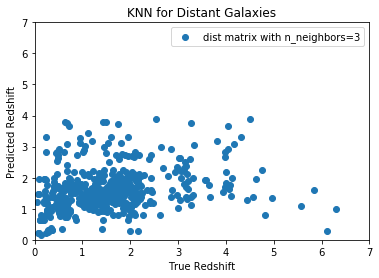

In [9]:
plt.scatter(t_test, preds, label="dist matrix with n_neighbors=%i" % 3)
plt.xlabel("True Redshift")
plt.ylabel("Predicted Redshift")
plt.title("KNN for Distant Galaxies")
plt.xlim([0,7])
plt.ylim([0,7])
plt.legend()
plt.show()